<h2><center><b>Customer Churn</b></center></h2>

In [2]:
!pip install pandas

In [4]:
!pip install matplotlib

In [6]:
!pip install seaborn

In [37]:
!pip install sklearn

In [40]:
from IPython.display import Image
import os

In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams

In [12]:
%matplotlib inline
# Loading the CSV with pandas
data = pd.read_csv('..data science projects/Customer Churn/Telecom_cust_churn.csv')

In [13]:
print (data.shape)

(3333, 21)


In [14]:
data.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


<AxesSubplot:>

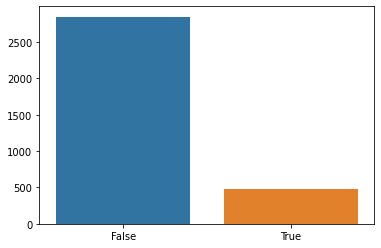

In [15]:
y = data["churn"].value_counts()
#print (y)
sns.barplot(y.index, y.values)

In [23]:
y_True = data["churn"][data["churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / data["churn"].shape[0]) * 100 ))

Churn Percentage = 14.491449144914492


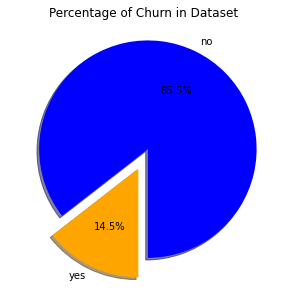

In [33]:
# Data to plot
sizes = data['churn'].value_counts(sort = True)
colors = ["blue","orange"] 
labels='no','yes'
explode=(0.1, 0.1)
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, explode=explode,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

 <h2>Descriptive Analysis</h2>

In [24]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


<h3> Churn by state</h3>

<AxesSubplot:xlabel='state'>

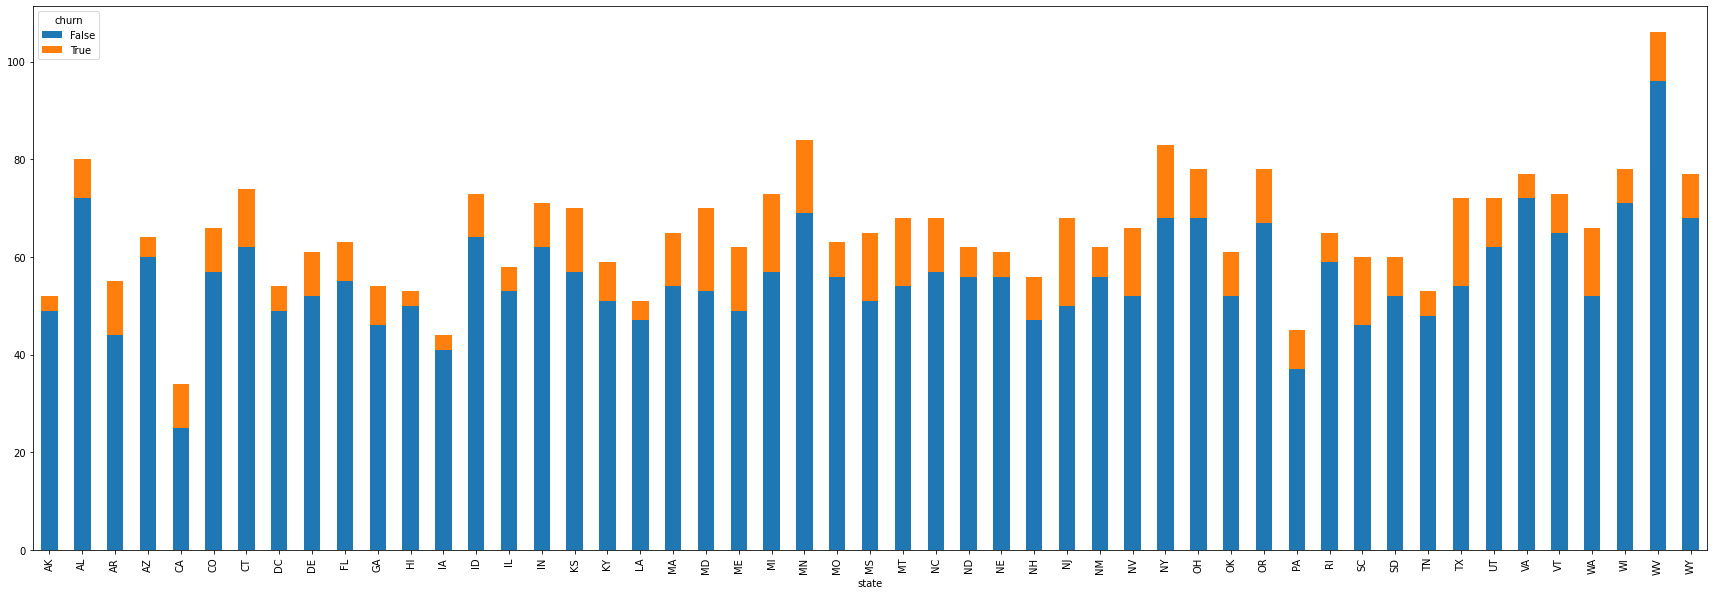

In [25]:
data.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

<h3> Churn by Area code</h3>

<AxesSubplot:xlabel='area code'>

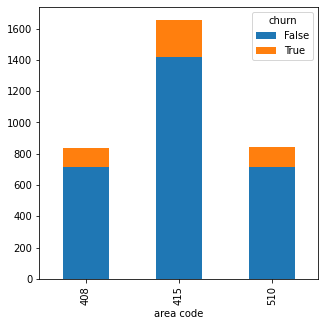

In [26]:
data.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

<h3> Data Preparation and Feature Engineering</h3>

In [94]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [41]:
label_encoder = preprocessing.LabelEncoder()

In [42]:
data['state'] = label_encoder.fit_transform(data['state'])
data['international plan'] = label_encoder.fit_transform(data['international plan'])
data['voice mail plan'] = label_encoder.fit_transform(data['voice mail plan'])

#print (df['Voice mail plan'][:4])
print (data.dtypes)

state                       int32
account length              int64
area code                   int64
phone number               object
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [43]:
data.shape

(3333, 21)

In [44]:
data.head

<bound method NDFrame.head of       state  account length  area code phone number  international plan  \
0        16             128        415     382-4657                   0   
1        35             107        415     371-7191                   0   
2        31             137        415     358-1921                   0   
3        35              84        408     375-9999                   1   
4        36              75        415     330-6626                   1   
...     ...             ...        ...          ...                 ...   
3328      3             192        415     414-4276                   0   
3329     49              68        415     370-3271                   0   
3330     39              28        510     328-8230                   0   
3331      6             184        510     364-6381                   1   
3332     42              74        415     400-4344                   0   

      voice mail plan  number vmail messages  total day minutes  \
0 

<h4> Strip off reponse values</h4>

In [46]:
y = data[['churn']].to_numpy()
y.size

3333

<h4> Strip of redundant columns</h4>

In [47]:
data.drop(["phone number","churn"], axis = 1, inplace=True)

In [48]:
data.head(3)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0


<h3> Build feature matrix</h3>

In [49]:
X = data.to_numpy()

In [50]:
X

array([[ 16.  , 128.  , 415.  , ...,   3.  ,   2.7 ,   1.  ],
       [ 35.  , 107.  , 415.  , ...,   3.  ,   3.7 ,   1.  ],
       [ 31.  , 137.  , 415.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [ 39.  ,  28.  , 510.  , ...,   6.  ,   3.81,   2.  ],
       [  6.  , 184.  , 510.  , ...,  10.  ,   1.35,   2.  ],
       [ 42.  ,  74.  , 415.  , ...,   4.  ,   3.7 ,   0.  ]])

In [51]:
X.shape

(3333, 19)

<h4> feature scaling (standardizing values)</h4>

In [52]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [53]:
X

array([[-0.6786493 ,  0.67648946, -0.52360328, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.52360328, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.33331299,  0.9025285 , -0.52360328, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [ 0.87302621, -1.83505538,  1.71881732, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [-1.35329082,  2.08295458,  1.71881732, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [ 1.07541867, -0.67974475, -0.52360328, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

<h3>Stratified Cross Validation - Since the Response values are not balanced</h3>

In [103]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = StratifiedKFold(n_splits=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X, y): 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test).reshape(X_test.shape[0],1)
    return y_pred

<h3> Build Models and Train</h3>

In [105]:
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))))

Gradient Boosting Classifier:  0.95
Support vector machine(SVM):   0.92
Random Forest Classifier:      0.95
K Nearest Neighbor Classifier: 0.89
Logistic Regression:           0.86


<h3>Confusion Matrices for various models</h3>

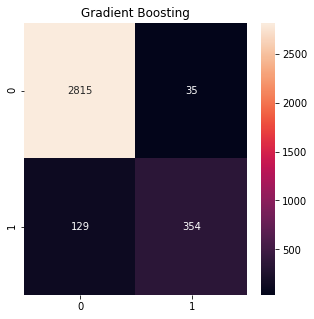

In [106]:
grad_ens_conf_matrix      = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))
sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='');
title = 'Gradient Boosting'
plt.title(title);

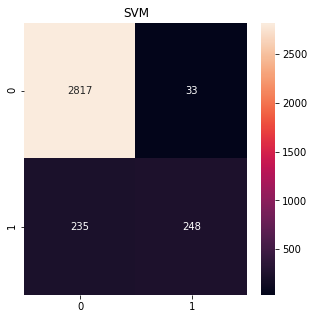

In [107]:
svm_svc_conf_matrix       = metrics.confusion_matrix(y, stratified_cv(X, y, svm.SVC))
sns.heatmap(svm_svc_conf_matrix, annot=True,  fmt='');
title = 'SVM'
plt.title(title);

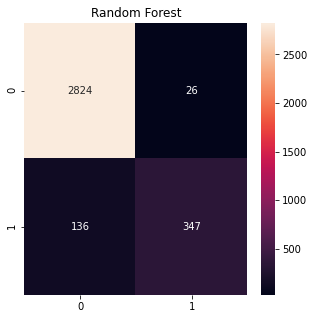

In [108]:
random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.RandomForestClassifier))
sns.heatmap(random_forest_conf_matrix, annot=True,  fmt='');
title = 'Random Forest'
plt.title(title);

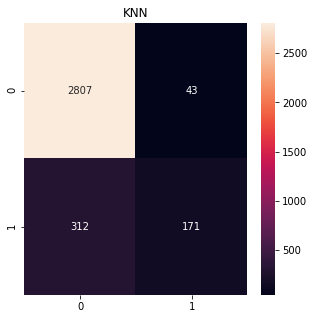

In [109]:
k_neighbors_conf_matrix   = metrics.confusion_matrix(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))
sns.heatmap(k_neighbors_conf_matrix, annot=True,  fmt='');
title = 'KNN'
plt.title(title);

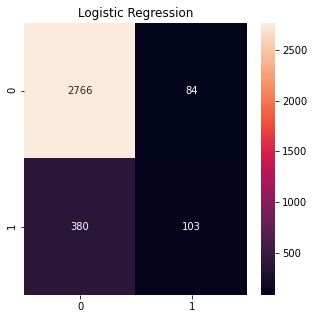

In [110]:
logistic_reg_conf_matrix  = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.LogisticRegression))
sns.heatmap(logistic_reg_conf_matrix, annot=True,  fmt='');
title = 'Logistic Regression'
plt.title(title);

In [111]:
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, linear_model.LogisticRegression))))

Gradient Boosting Classifier:
               precision    recall  f1-score   support

       False       0.96      0.99      0.97      2850
        True       0.91      0.73      0.81       483

    accuracy                           0.95      3333
   macro avg       0.93      0.86      0.89      3333
weighted avg       0.95      0.95      0.95      3333


Support vector machine(SVM):
               precision    recall  f1-score   support

       False       0.92      0.99      0.95      2850
        True       0.88      0.51      0.65       483

    accuracy                           0.92      3333
   macro avg       0.90      0.75      0.80      3333
weighted avg       0.92      0.92      0.91      3333


Random Forest Classifier:
               precision    recall  f1-score   support

       False       0.95      0.99      0.97      2850
        True       0.94      0.71      0.81       483

    accuracy                           0.95      3333
   macro avg       0.94      0.85     

<h4> final model selection </h4>

In [112]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)

GradientBoostingClassifier()

[0.00189273 0.00352162 0.0003414  0.09486837 0.02218814 0.06105097
 0.15973489 0.0046965  0.13090728 0.07779427 0.00135536 0.06504675
 0.01072002 0.00068683 0.0073353  0.03318342 0.11087915 0.05025976
 0.16353726]


<AxesSubplot:>

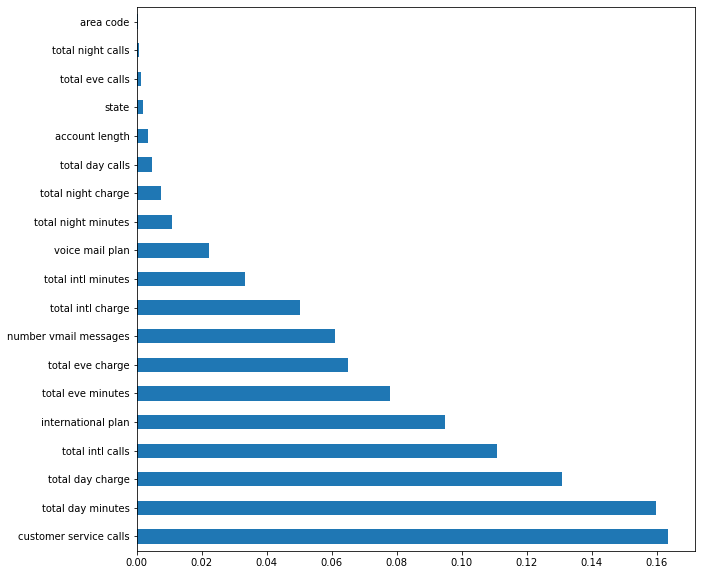

In [114]:
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
print (gbc.feature_importances_)
feat_importances = pd.Series(gbc.feature_importances_, index=data.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10)) 